In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import arviz as az
import bambi as bmb

az.style.use('arviz-darkgrid')
sns.set_style("darkgrid")
sat_df = pd.read_csv('data/sat_df.csv')
sat_df.head()


weekend  num_child   distance  rides  games  wait  clean  overall
0      no          1  24.605443   73.0   70.0  66.0   79.0     52.0
1     yes          1  31.293988   75.0   74.0  66.0   83.0     54.0
2      no          1   6.077646   65.0   68.0  69.0   78.0     33.0
3     yes          0  25.623529   74.0   72.0  73.0   85.0     30.0
4     yes          2  48.947037   76.0   75.0  74.0   82.0     61.0

In [3]:
sat_df.describe(include='all')

weekend   num_child    distance       rides       games        wait  \
count      500  500.000000  500.000000  500.000000  500.000000  500.000000   
unique       2         NaN         NaN         NaN         NaN         NaN   
top         no         NaN         NaN         NaN         NaN         NaN   
freq       262         NaN         NaN         NaN         NaN         NaN   
mean       NaN    1.688000   31.476842   80.706000   74.596000   73.184000   
std        NaN    1.516329   35.965538    5.624129    8.599109   10.914779   
min        NaN    0.000000    1.048239   62.000000   48.000000   37.000000   
25%        NaN    0.000000   10.727687   77.000000   69.000000   65.000000   
50%        NaN    2.000000   19.856045   81.000000   75.000000   74.000000   
75%        NaN    3.000000   39.524517   85.000000   80.000000   81.000000   
max        NaN    5.000000  300.243254  100.000000  100.000000  100.000000   

             clean     overall  
count   500.000000  500.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean     85.382000   53.488000  
std       5.229031   16.594596  
min      67.000000    8.000000  
25%      82.000000   42.750000  
50%      85.000000   54.000000  
75%      89.000000   65.000000  
max     100.000000  100.000000

In [4]:
sat_df.dtypes

weekend       object
num_child      int64
distance     float64
rides        float64
games        float64
wait         float64
clean        float64
overall      float64
dtype: object

In [11]:
sat_df.weekend = sat_df.weekend.astype('category')

/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


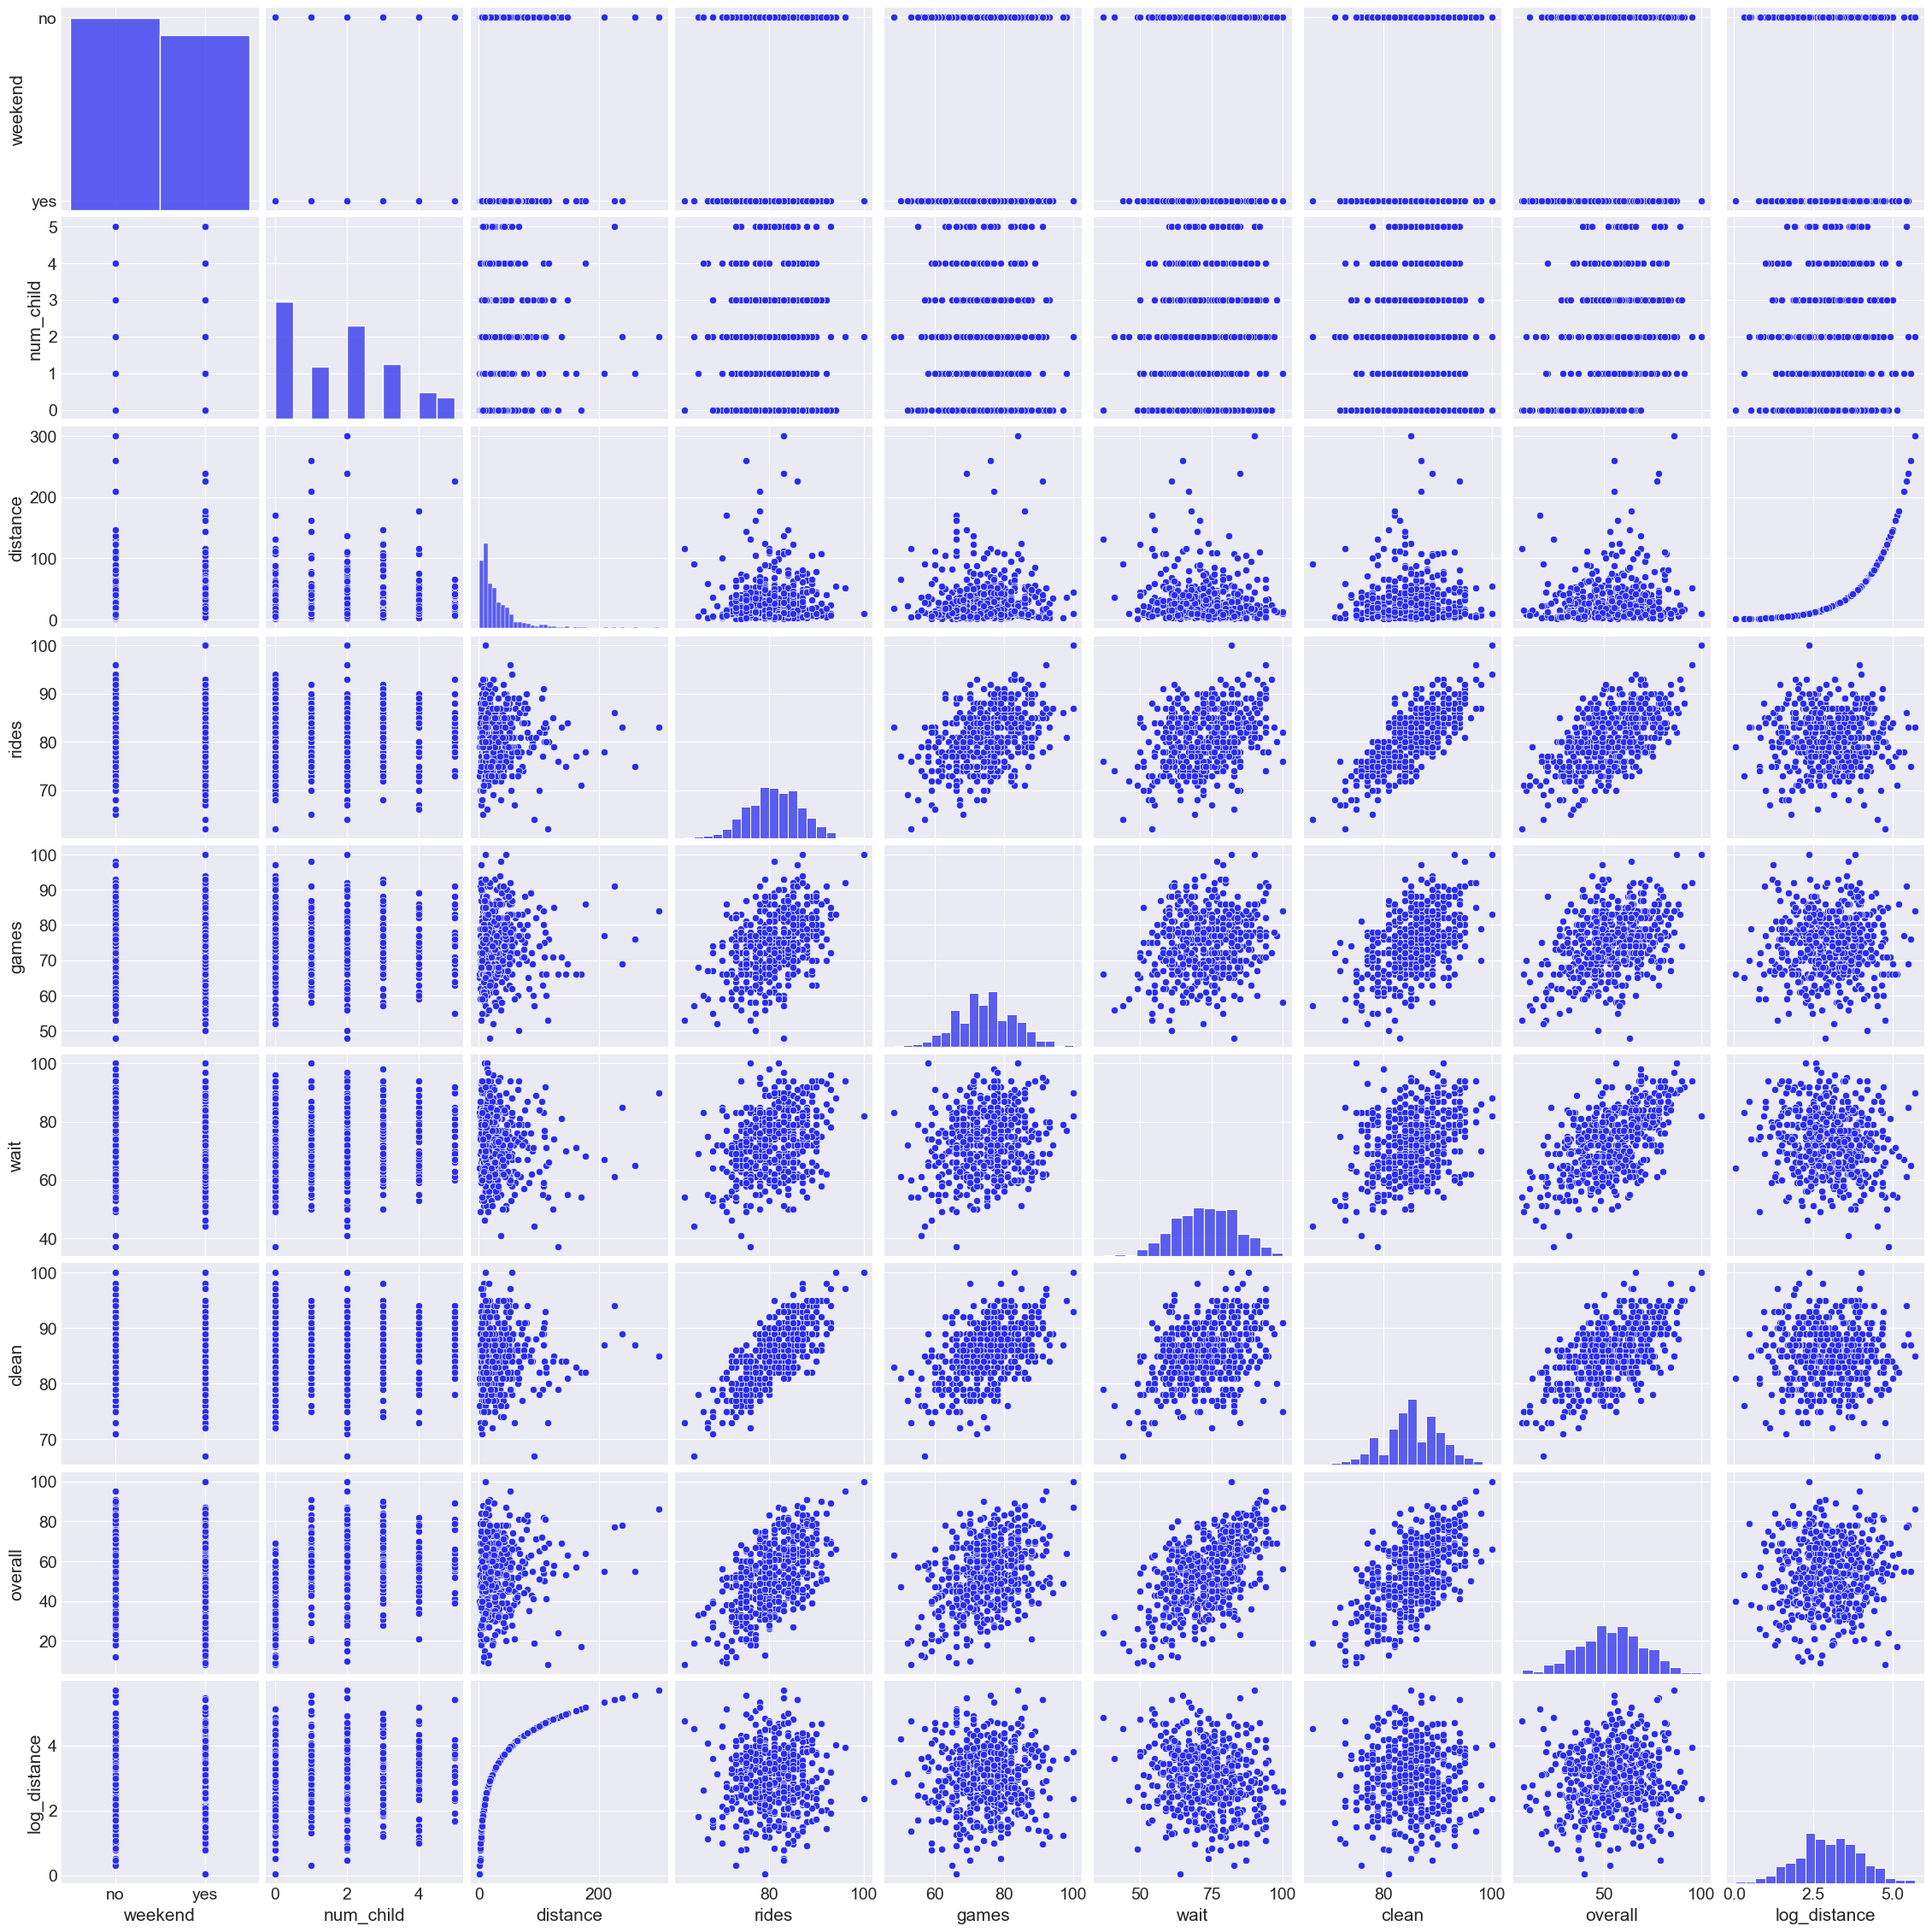

In [12]:
sns.pairplot(sat_df, vars = sat_df.columns);

/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)
/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


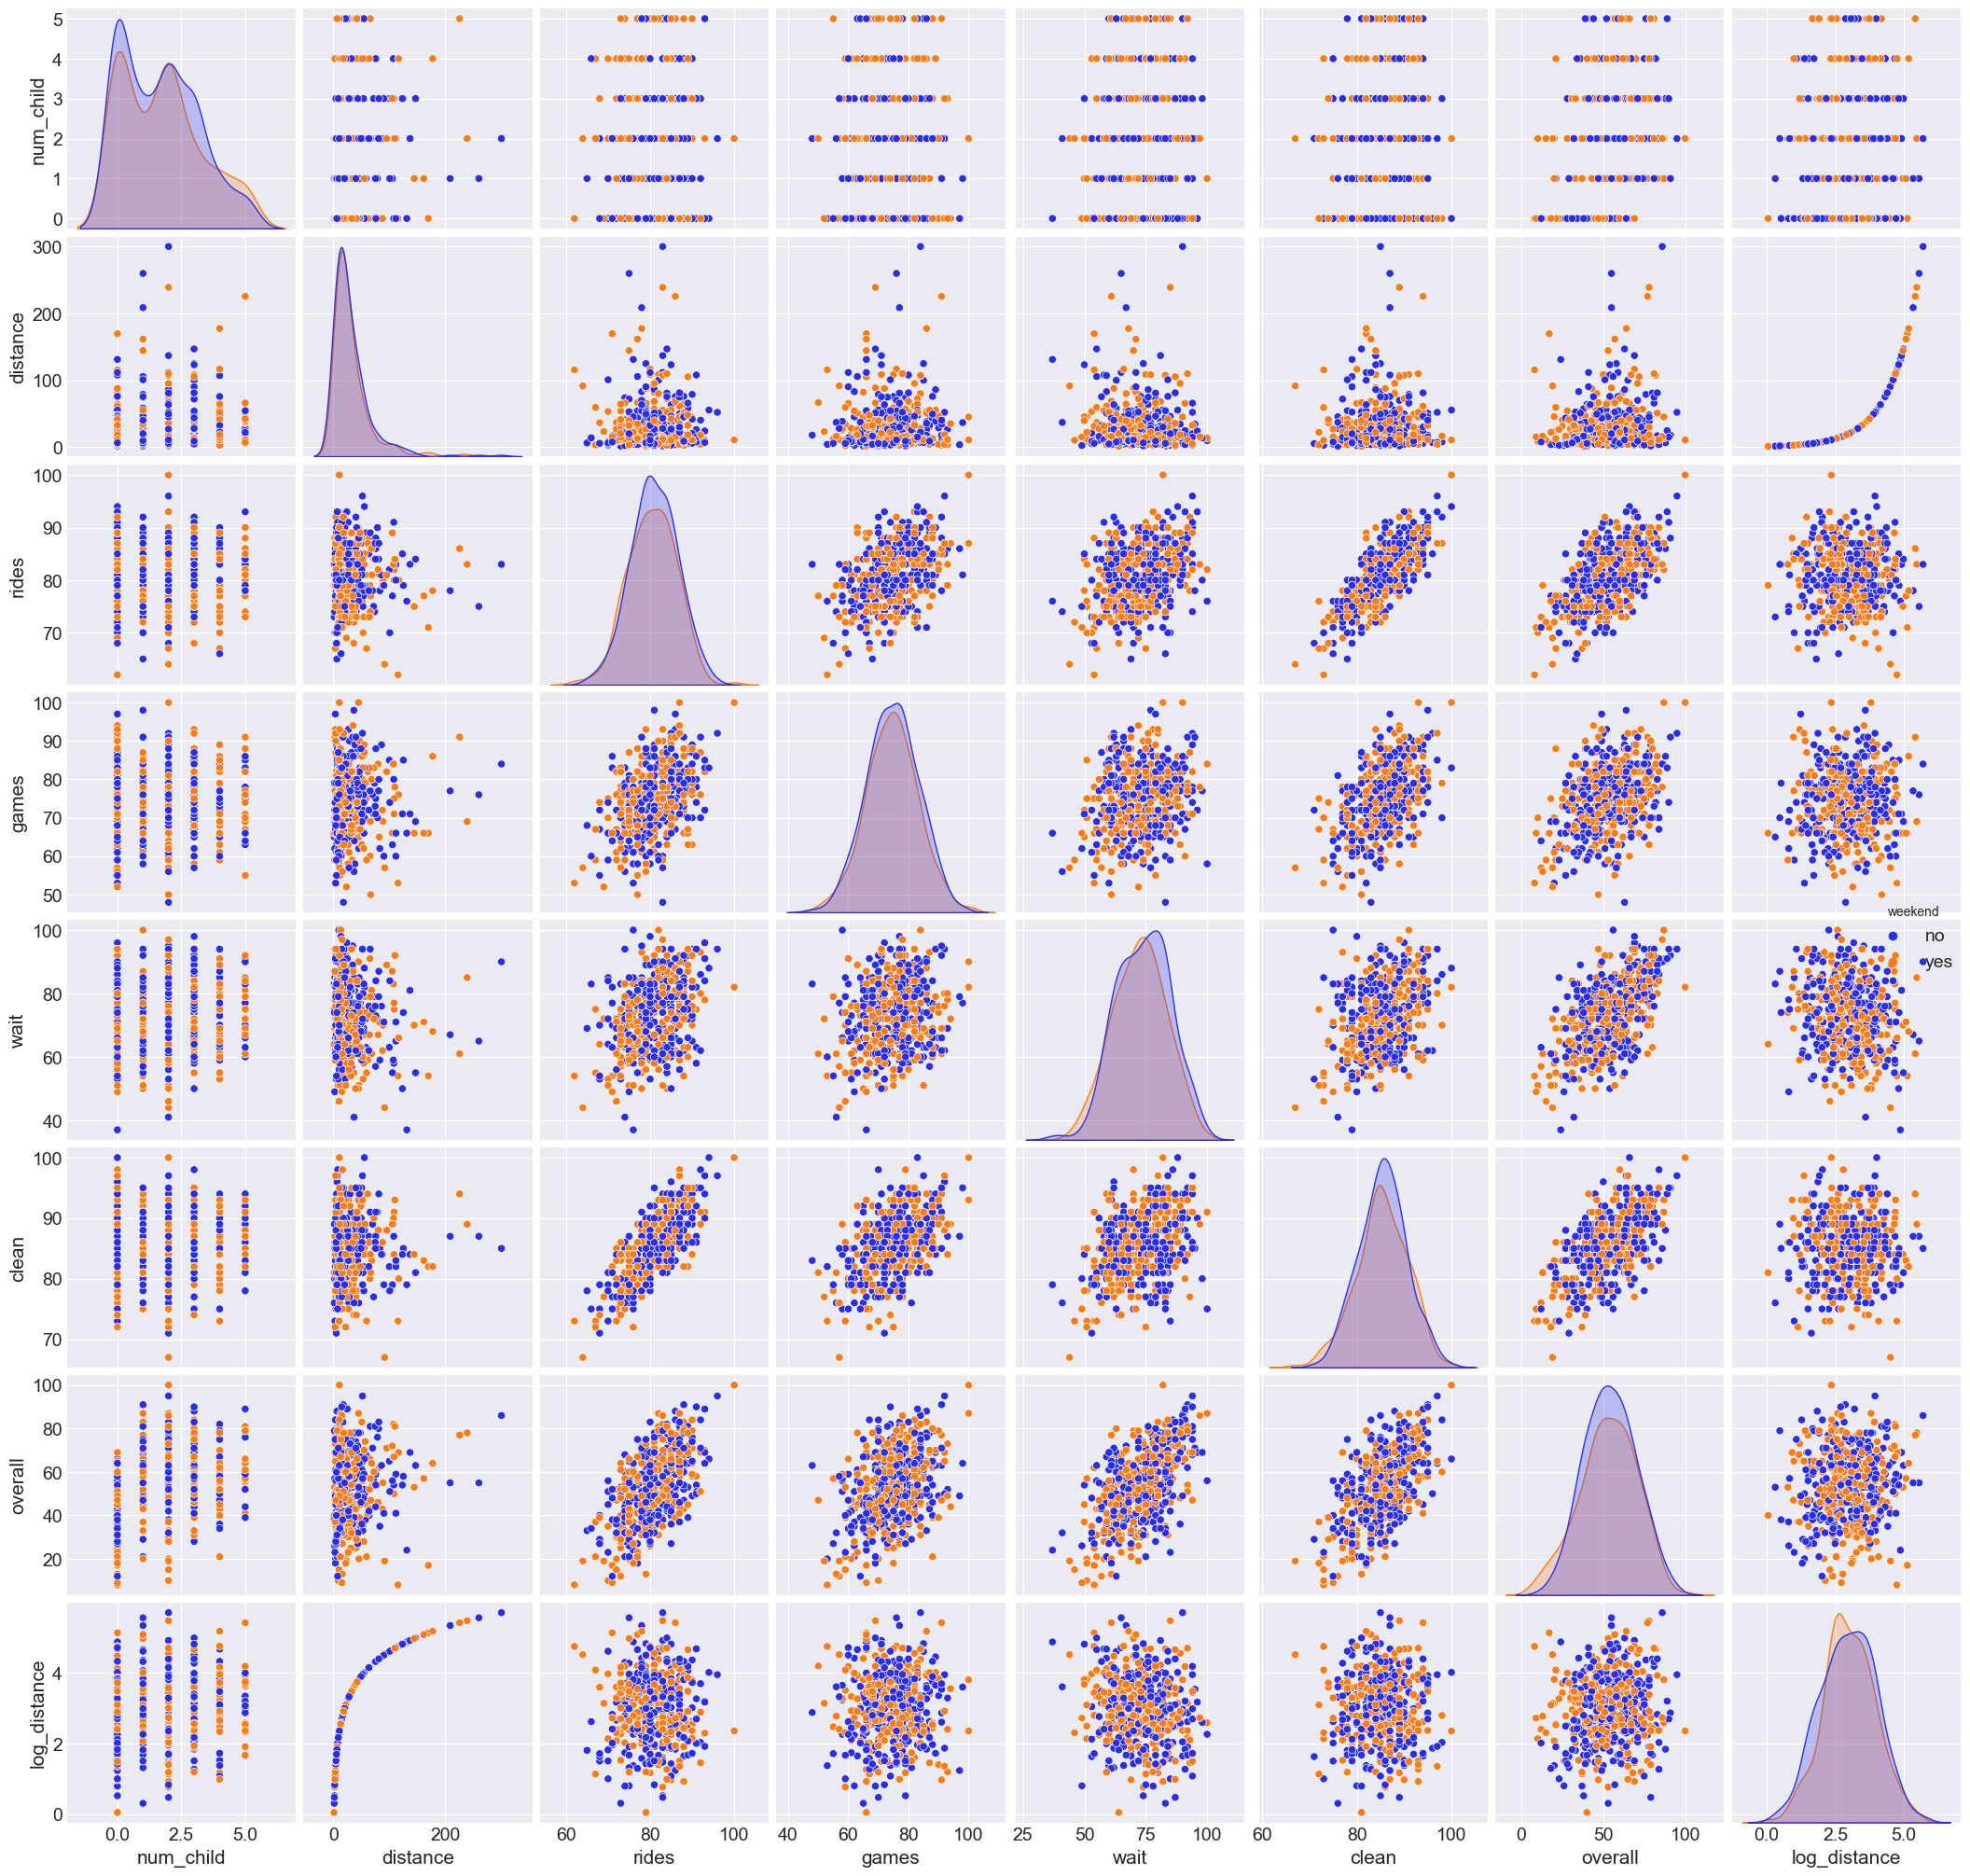

In [13]:
sns.pairplot(sat_df, hue='weekend');

/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/guilhermediaz-berrio/.pyenv/versions/3.11.3/envs/book-mkt-analytics/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


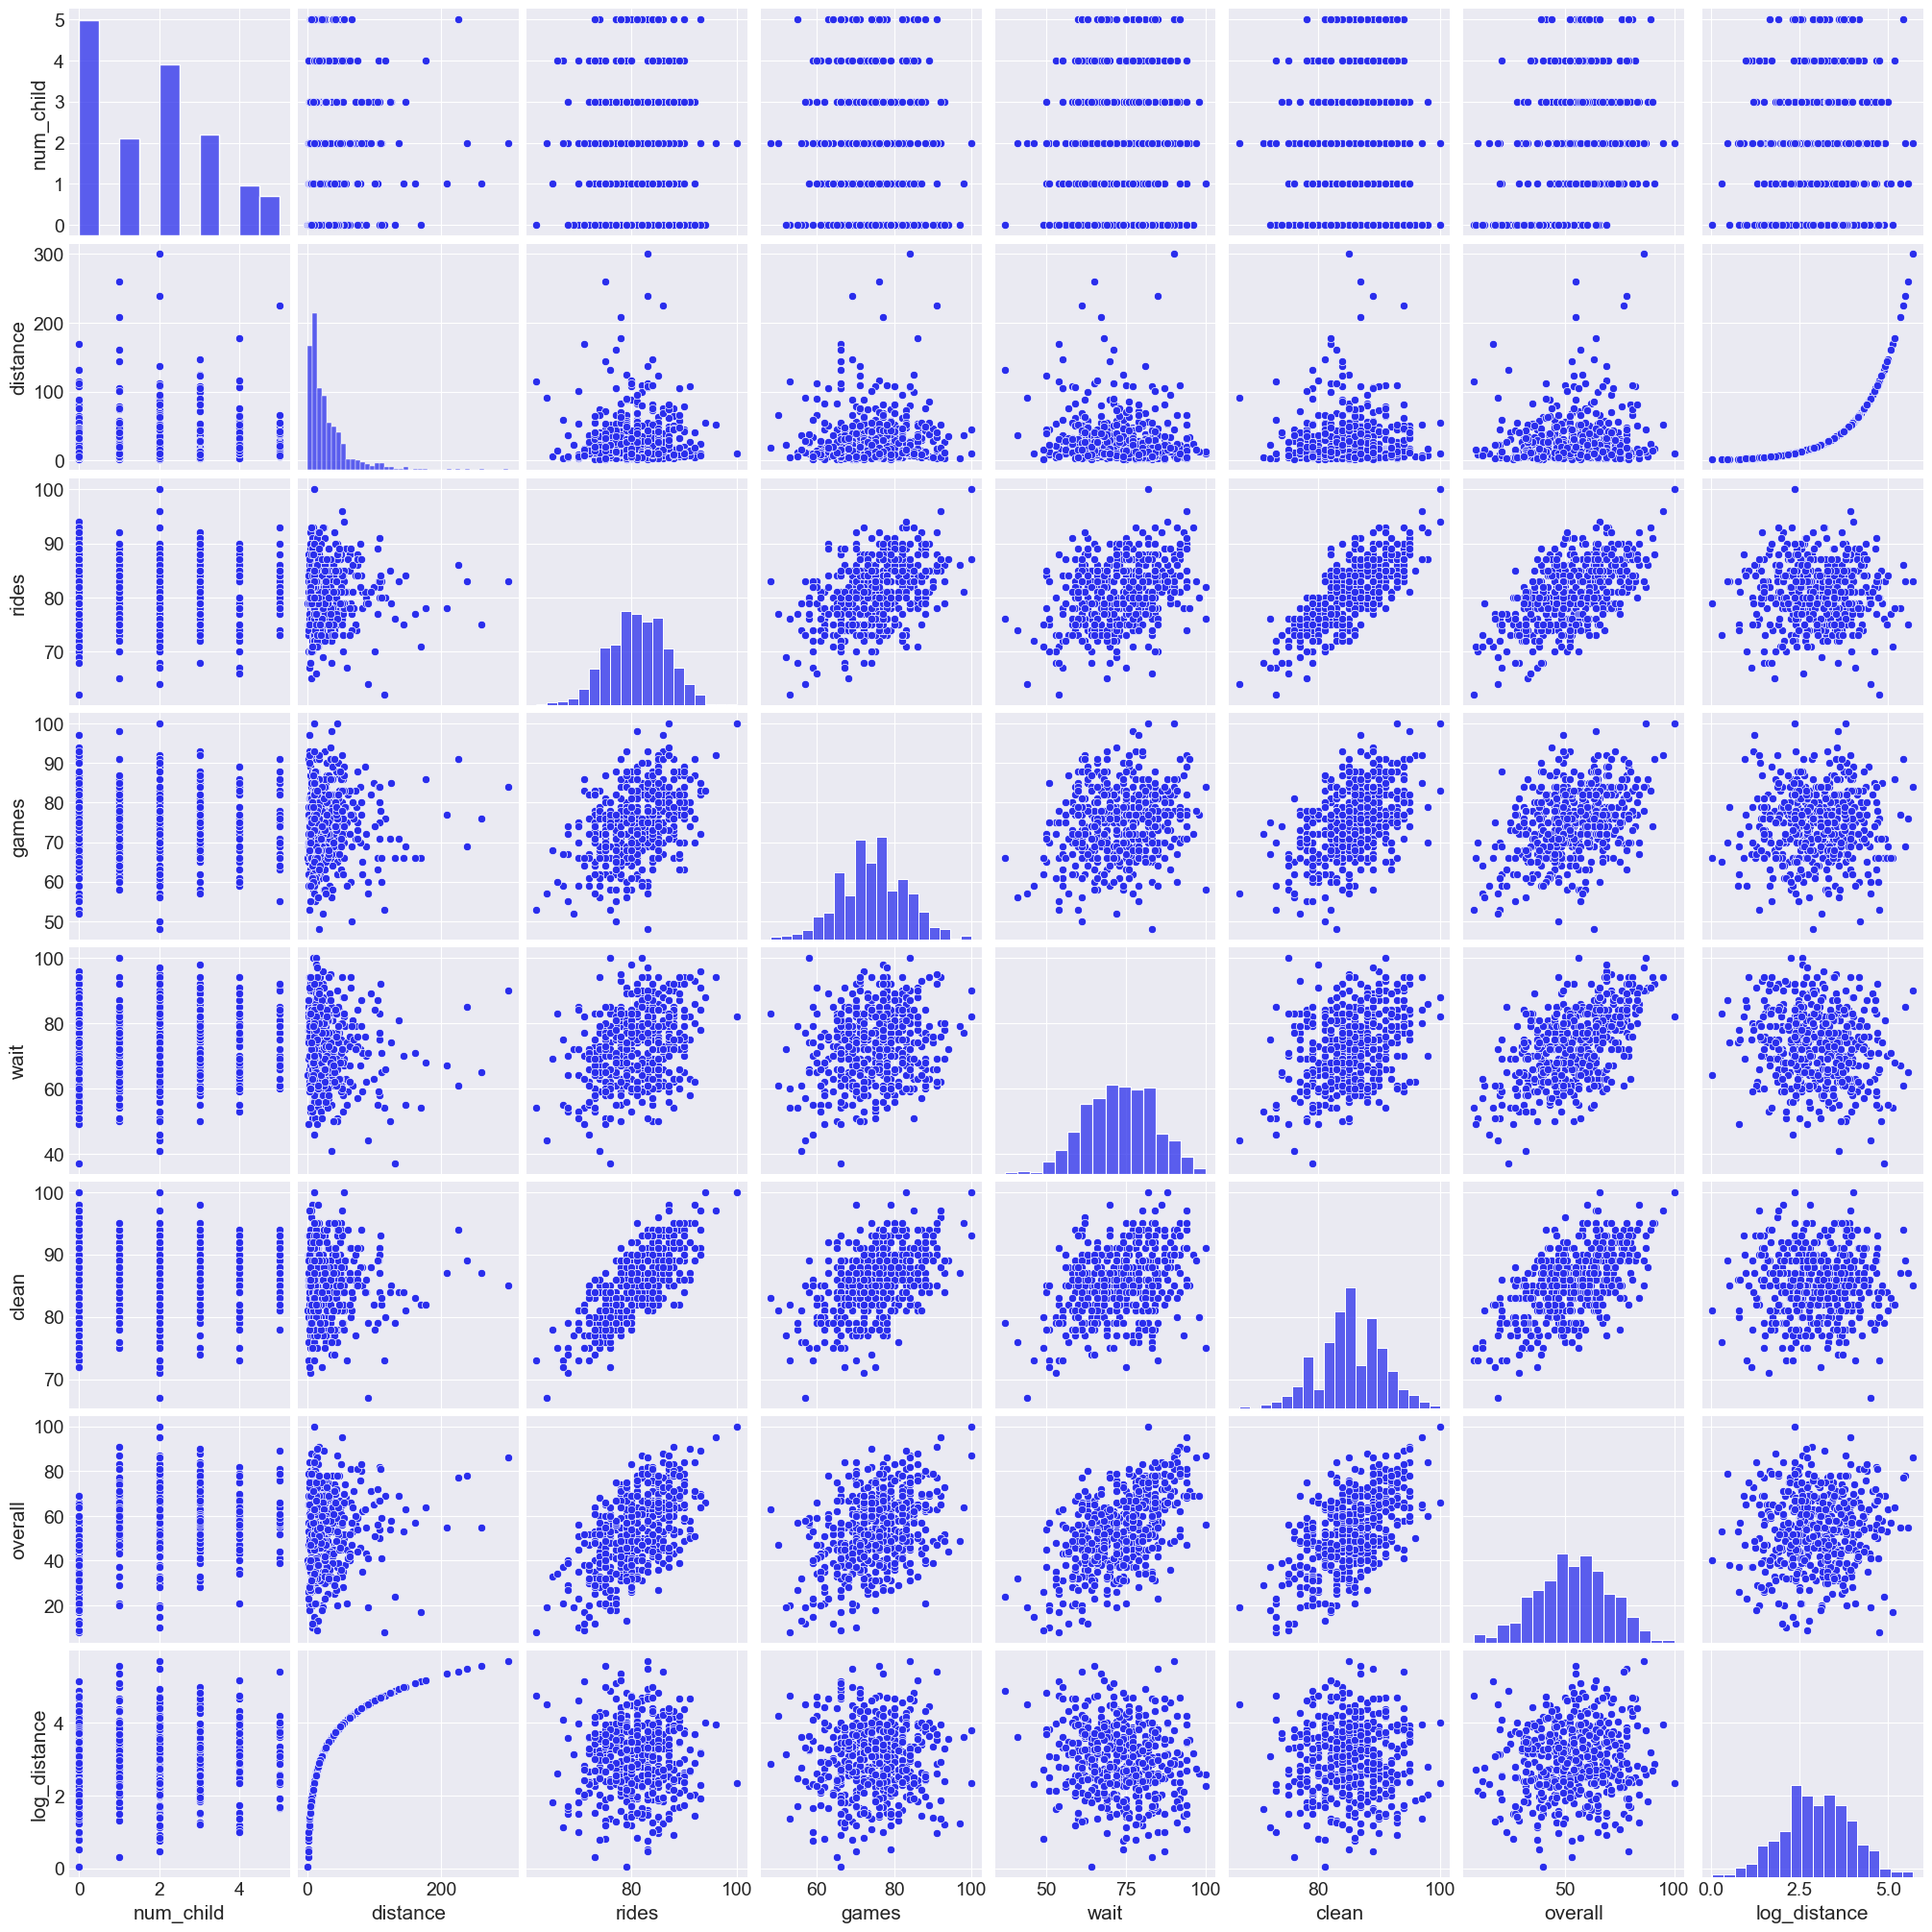

In [14]:
sat_df['log_distance'] = np.log(sat_df.distance)
sns.pairplot(sat_df);


In [15]:
sat_df.dtypes

weekend         category
num_child          int64
distance         float64
rides            float64
games            float64
wait             float64
clean            float64
overall          float64
log_distance     float64
dtype: object

In [16]:
sat_df.columns

Index(['weekend', 'num_child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall', 'log_distance'],
      dtype='object')

In [18]:
corr_matrix = sat_df[['num_child', 'distance', 'rides', 'games', 'wait', 'clean',
       'overall', 'log_distance']].corr()
corr_matrix


num_child  distance     rides     games      wait     clean  \
num_child      1.000000  0.046587  0.001207  0.007220  0.078791  0.004446   
distance       0.046587  1.000000 -0.015748  0.013698 -0.113510 -0.004754   
rides          0.001207 -0.015748  1.000000  0.444025  0.334231  0.769007   
games          0.007220  0.013698  0.444025  1.000000  0.230452  0.504474   
wait           0.078791 -0.113510  0.334231  0.230452  1.000000  0.391711   
clean          0.004446 -0.004754  0.769007  0.504474  0.391711  1.000000   
overall        0.442498  0.100449  0.577254  0.411894  0.576664  0.591888   
log_distance   0.051391  0.817402  0.004973  0.036145 -0.130803  0.004057   

               overall  log_distance  
num_child     0.442498      0.051391  
distance      0.100449      0.817402  
rides         0.577254      0.004973  
games         0.411894      0.036145  
wait          0.576664     -0.130803  
clean         0.591888      0.004057  
overall       1.000000      0.081916  
log_distance  0.081916      1.000000

<Axes: >

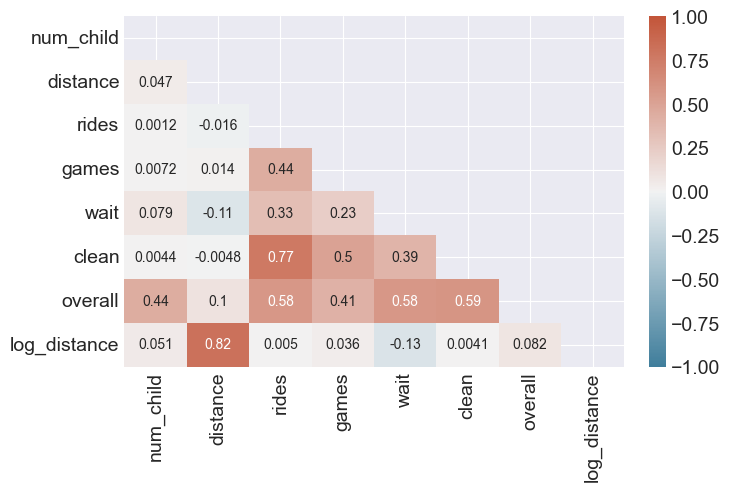

In [20]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, vmax = 1, vmin = -1)


In [21]:
model_1 = bmb.Model('overall ~ rides', data=sat_df)
results_1 = model_1.fit()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [overall_sigma, Intercept, rides]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
